In [3]:
'''
findcontours 具体使用
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import show_images

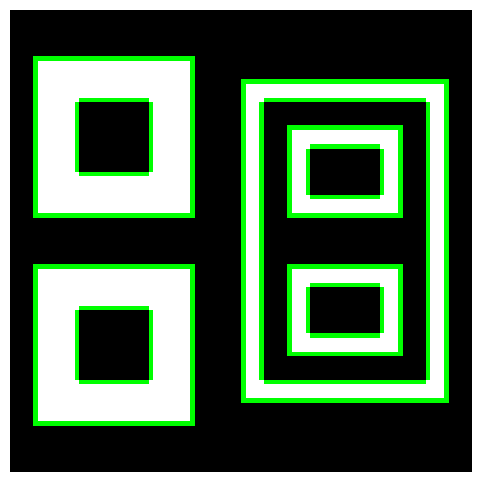

In [5]:
# 1. 解析返回值的 contours
# 先不管传入的参数，反正返回了两个信息: contours, hierachy
src = cv2.imread('./image/findcontours-1.png', -1)
contours, hierachy = cv2.findContours(src, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# 解析轮廓信息，用绿色画出来
dst = cv2.cvtColor(np.copy(src), cv2.COLOR_GRAY2BGR)
for i in range(len(contours)):
    # 第 i 个轮廓的信息，假设有 n 个 点
    now_contours = contours[i] # (n, 1, 2)
    now_hierachy = hierachy[0][i] # (4)

    # ! 画出轮廓，注意返回的 contours 中顺序是 纵坐标、横坐标
    point_set = now_contours[:, 0]
    dst[point_set[:, 1], point_set[:, 0]] = [0, 255, 0]

show_images([('', dst)])

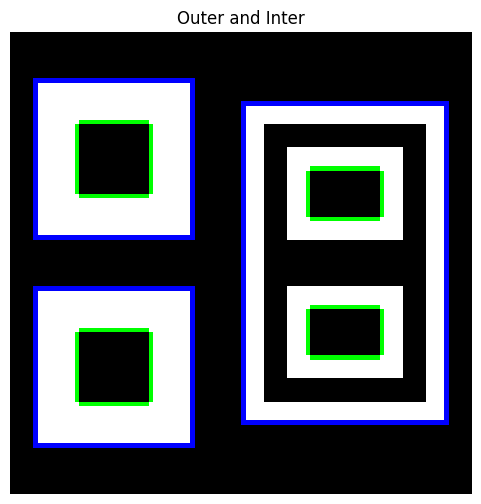

In [6]:
# 2. 解析返回值的 hierachy
# 先不管传入的参数，反正返回了两个信息: contours, hierachy
src = cv2.imread('./image/findcontours-1.png', -1)
contours, hierachy = cv2.findContours(src, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# 利用 hierachy 信息画出最里面的轮廓（绿色）、最外面轮廓信息（红色）
dst = cv2.cvtColor(np.copy(src), cv2.COLOR_GRAY2BGR)
for i in range(len(contours)):
    # 第 i 个轮廓的信息，假设有 n 个 点
    now_contours = contours[i] # (n, 1, 2)
    now_hierachy = hierachy[0][i] # (4)

    # ! 现在添加了判断，利用 hierachy，该信息四个值分别为:
    # the next and previous contours at the same hierarchical level, the first child contour and the parent contour
    # If for the contour i there are no next, previous, parent, or nested contours, the corresponding elements will be negative.

    # 如果 child 为 负数，说明这个轮廓是最里面的轮廓了
    if now_hierachy[2] < 0:
        point_set = now_contours[:, 0]
        dst[point_set[:, 1], point_set[:, 0]] = [0, 255, 0]

    # 如果 parent 为 负数，说明这个轮廓是最外面的轮廓了
    if now_hierachy[3] < 0:
        point_set = now_contours[:, 0]
        dst[point_set[:, 1], point_set[:, 0]] = [255, 0, 0]

show_images([('Outer and Inter', dst)])

RETR_EXTERNAL 只找外部
RETR_LIST 不管继承信息
RETR_CCOMP 只有两个层级
RETR_TREE 所有信息


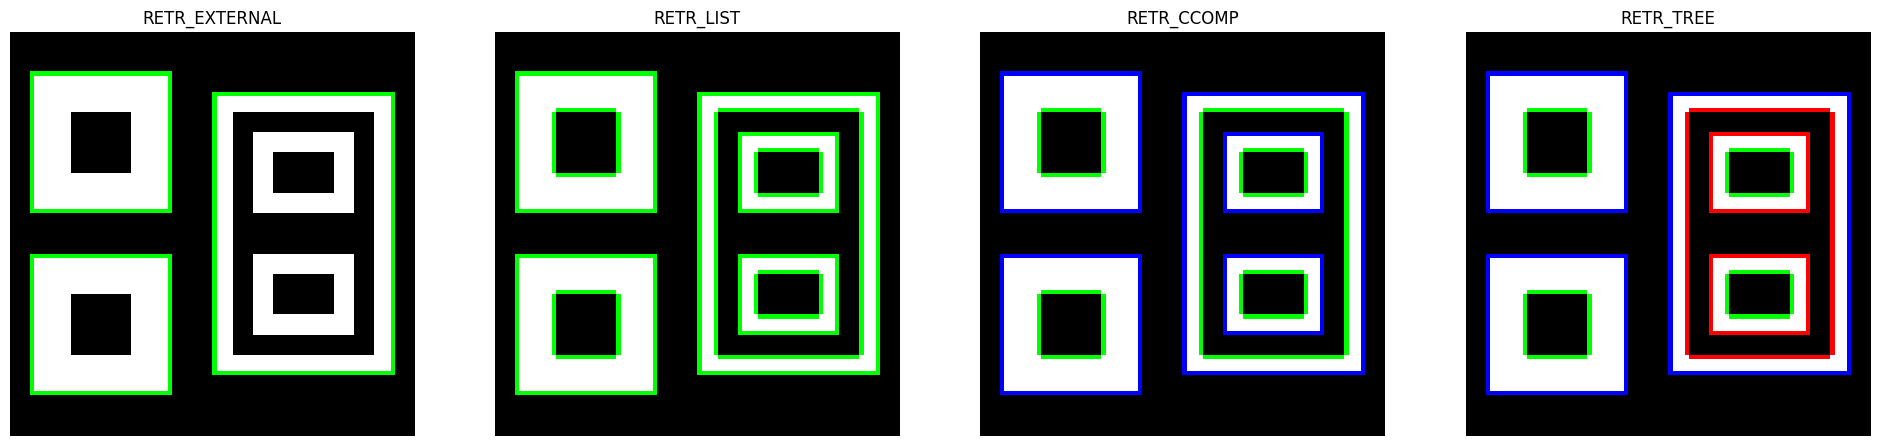

In [7]:
# 3. 不同 mode 的比较
modes = {cv2.RETR_EXTERNAL, cv2.RETR_LIST, cv2.RETR_CCOMP, cv2.RETR_TREE}
explains = {
    'RETR_EXTERNAL': '只找外部',
    'RETR_LIST': '不管继承信息',
    'RETR_CCOMP': '只有两个层级',
    'RETR_TREE': '所有信息',
}
results = []

src = cv2.imread('./image/findcontours-1.png', -1)
for modename, mode in zip(explains, modes):
    contours, hierachy = cv2.findContours(src, mode, method=cv2.CHAIN_APPROX_NONE)

    # 利用 hierachy 信息画出最里面的轮廓（绿色）、最外面轮廓信息（红色）
    dst = cv2.cvtColor(np.copy(src), cv2.COLOR_GRAY2BGR)
    for i in range(len(contours)):
        # 第 i 个轮廓的信息，假设有 n 个 点
        now_contours = contours[i] # (n, 1, 2)
        now_hierachy = hierachy[0][i] # (4)

        point_set = now_contours[:, 0]
        # 如果 child 为 负数，说明这个轮廓是最里面的轮廓了
        if now_hierachy[2] < 0:
            dst[point_set[:, 1], point_set[:, 0]] = [0, 255, 0]
            continue

        # 如果 parent 为 负数，说明这个轮廓是最外面的轮廓了
        if now_hierachy[3] < 0:
            dst[point_set[:, 1], point_set[:, 0]] = [255, 0, 0]
            continue
        
        dst[point_set[:, 1], point_set[:, 0]] = [0, 0, 255]
        
    print(modename, explains[modename])
    results.append([modename, dst])

show_images(results)

黑白颠倒后结果


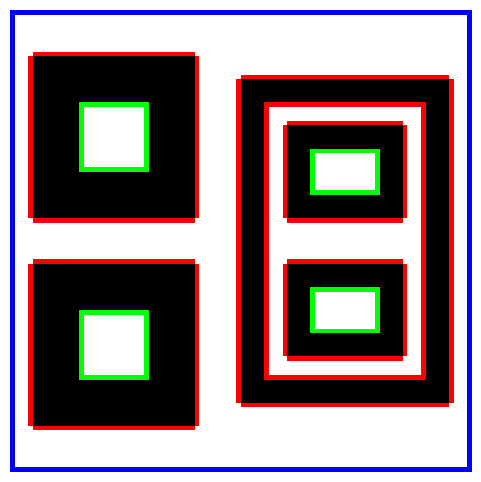

In [8]:
# 4. 注意点：找的是白色物体的轮廓
src = cv2.imread('./image/findcontours-1.png', -1)
src = cv2.bitwise_not(src)
contours, hierachy = cv2.findContours(src, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# 利用 hierachy 信息画出最里面的轮廓（绿色）、最外面轮廓信息（红色）
dst = cv2.cvtColor(np.copy(src), cv2.COLOR_GRAY2BGR)
for i in range(len(contours)):
    # 第 i 个轮廓的信息，假设有 n 个 点
    now_contours = contours[i] # (n, 1, 2)
    now_hierachy = hierachy[0][i] # (4)

    point_set = now_contours[:, 0]
    # 如果 child 为 负数，说明这个轮廓是最里面的轮廓了
    if now_hierachy[2] < 0:
        dst[point_set[:, 1], point_set[:, 0]] = [0, 255, 0]
        continue

    # 如果 parent 为 负数，说明这个轮廓是最外面的轮廓了
    if now_hierachy[3] < 0:
        dst[point_set[:, 1], point_set[:, 0]] = [255, 0, 0]
        continue
    
    dst[point_set[:, 1], point_set[:, 0]] = [0, 0, 255]
    
print('黑白颠倒后结果')
show_images([('', dst)])

一条细线外轮廓和内轮廓都是一样的，因此要注意一条细线的场景


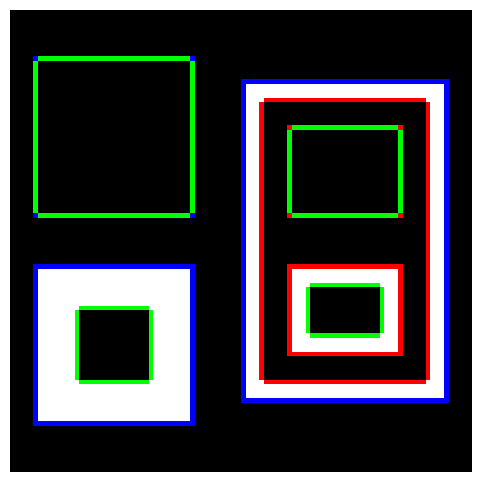

In [10]:
# 5. 注意点：一条细线可能有问题，此时判断的外轮廓和内轮廓是一样的
src = cv2.imread('./image/findcontours-2.png', -1)
contours, hierachy = cv2.findContours(src, cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# 利用 hierachy 信息画出最里面的轮廓（绿色）、最外面轮廓信息（红色）
dst = cv2.cvtColor(np.copy(src), cv2.COLOR_GRAY2BGR)
for i in range(len(contours)):
    # 第 i 个轮廓的信息，假设有 n 个 点
    now_contours = contours[i] # (n, 1, 2)
    now_hierachy = hierachy[0][i] # (4)

    point_set = now_contours[:, 0]
    # 如果 child 为 负数，说明这个轮廓是最里面的轮廓了
    if now_hierachy[2] < 0:
        dst[point_set[:, 1], point_set[:, 0]] = [0, 255, 0]
        continue

    # 如果 parent 为 负数，说明这个轮廓是最外面的轮廓了
    if now_hierachy[3] < 0:
        dst[point_set[:, 1], point_set[:, 0]] = [255, 0, 0]
        continue
    
    dst[point_set[:, 1], point_set[:, 0]] = [0, 0, 255]
    
print('一条细线外轮廓和内轮廓都是一样的，因此要注意一条细线的场景')
show_images([('', dst)])